# Homework 3 solutions

We want to integrate the simple pendulum without the small angle approximation and compare different integration schemes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SimplePendulum:
    """ manage and integrate a simple pendulum """

    def __init__(self, theta0, g=9.81, L=9.81, method="Euler"):
        """we'll take theta0 in degrees and assume that the angular
        velocity is initially 0"""
        
        # initial condition
        self.theta0 = np.radians(theta0)

        self.g = g
        self.L = L

    def energy(self, theta_vec, omega_vec):
        """ given a solution, return the energy (per unit mass) """
        return 0.5 * self.L**2 * omega_vec**2 - self.g * self.L * np.cos(theta_vec)

    def period(self):
        """ return an estimate of the period, up to the theta**2 term """
        return 2.0 * np.pi * np.sqrt(self.L / self.g) * (1.0 + self.theta0**2 / 16.0)

    def rhs(self, theta, omega):
        """ equations of motion for a pendulum
              dtheta/dt = omega
              domega/dt = - (g/L) sin theta """

        return np.array([omega, -(self.g / self.L) * np.sin(theta)])

    def integrate_euler(self, dt, tmax):
        """ integrate the equations of motion using Euler's method """

        # initial conditions
        t = 0.0

        t_s = [t]
        theta_s = [self.theta0]
        omega_s = [0.0]

        while t < tmax:

            # initial state
            theta = theta_s[-1]
            omega = omega_s[-1]
            
            # get the RHS
            thetadot, omegadot = self.rhs(theta, omega)

            # advance
            theta_new = theta + dt * thetadot
            omega_new = omega + dt * omegadot

            t += dt

            # store
            t_s.append(t)
            theta_s.append(theta_new)
            omega_s.append(omega_new)

        return np.array(t_s), np.array(theta_s), np.array(omega_s)
        
    def integrate_ec(self, dt, tmax):
        """ integrate the equations of motion using the Euler-Cromer method """

        # initial conditions
        t = 0.0

        t_s = [t]
        theta_s = [self.theta0]
        omega_s = [0.0]

        while t < tmax:

            # initial state
            theta = theta_s[-1]
            omega = omega_s[-1]
            
            # get the RHS
            thetadot, omegadot = self.rhs(theta, omega)

            # advance
            omega_new = omega + dt * omegadot
            theta_new = theta + dt * omega_new

            t += dt

            # store
            t_s.append(t)
            theta_s.append(theta_new)
            omega_s.append(omega_new)

        return np.array(t_s), np.array(theta_s), np.array(omega_s)
    
    def integrate_vv(self, dt, tmax):
        """ integrate the equations of motion using velocity Verlet method """

        # initial conditions
        t = 0.0

        t_s = [t]
        theta_s = [self.theta0]
        omega_s = [0.0]

        while t < tmax:

            # initial state
            theta = theta_s[-1]
            omega = omega_s[-1]
            
            # get the RHS at time-level n
            thetadot, omegadot = self.rhs(theta, omega)

            omega_half = omega + 0.5 * dt * omegadot
                
            theta_new = theta + dt * omega_half

            # get the RHS with the updated theta -- omega doesn't matter
            # here, since we only need thetadot and omega doesn't affect
            # that.
            _, omegadot_new = self.rhs(theta_new, omega)
            omega_new = omega_half + 0.5 * dt * omegadot_new

            t += dt

            # store
            t_s.append(t)
            theta_s.append(theta_new)
            omega_s.append(omega_new)

        return np.array(t_s), np.array(theta_s), np.array(omega_s)

Let's try it out

## Case 1: $\theta_0 = 10^\circ$

In [3]:
# initial angle in degrees -- the class converts to radians
theta0 = 10

p10 = SimplePendulum(theta0)
period = p10.period()
print(f"{period=}")

period=6.295147605281553


Euler's method

In [4]:
# fixed timestep
dt = 0.1
tmax = 10 * period

In [5]:
t_euler, theta_euler, omega_euler = p10.integrate_euler(dt, tmax)

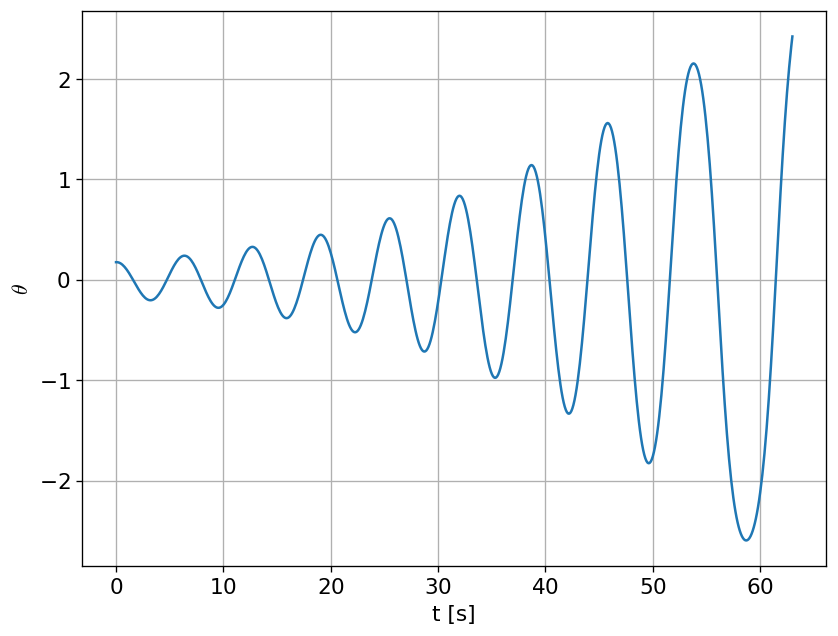

In [6]:
fig, ax = plt.subplots()
ax.plot(t_euler, theta_euler, label="Euler")

ax.set_xlabel("t [s]")
ax.set_ylabel(r"$\theta$")

ax.grid()

Now let's do Euler-Cromer

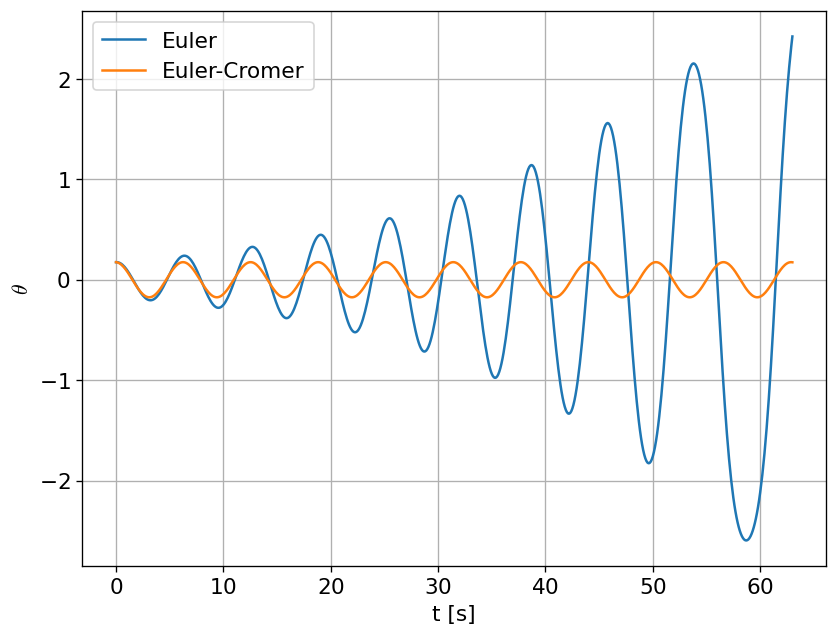

In [7]:
t_ec, theta_ec, omega_ec = p10.integrate_ec(dt, tmax)

ax.plot(t_ec, theta_ec, label="Euler-Cromer")
ax.legend()
fig

finally velocity-Verlet

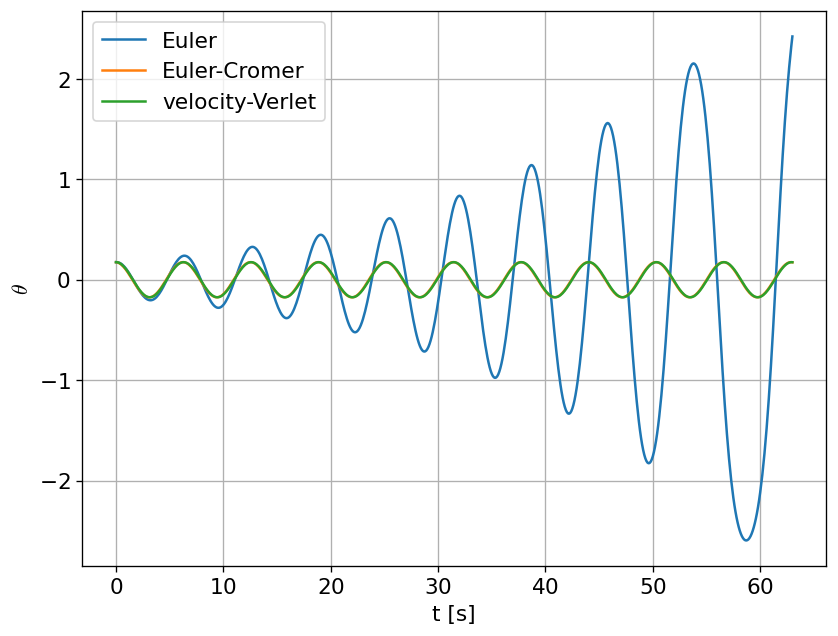

In [8]:
t_vv, theta_vv, omega_vv = p10.integrate_vv(dt, tmax)

ax.plot(t_vv, theta_vv, label="velocity-Verlet")
ax.legend()
fig

We see that the Euler-Cromer and velocity-Verlet solutions look the same, and the amplitude of the pendulum does not change noticably with time&mdash;as expected, since there is no damping in the system.

Let's look at energy

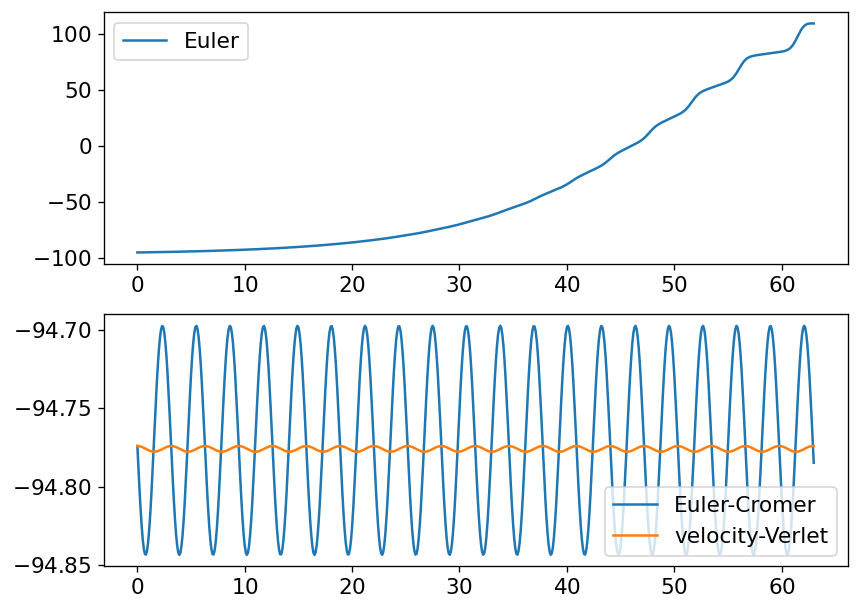

In [9]:
E_euler = p10.energy(theta_euler, omega_euler)
E_ec = p10.energy(theta_ec, omega_ec)
E_vv = p10.energy(theta_vv, omega_vv)

fig = plt.figure()

ax1 = fig.add_subplot(211)

ax1.plot(t_euler, E_euler, label="Euler")
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(t_ec, E_ec, label="Euler-Cromer")
ax2.plot(t_vv, E_vv, label="velocity-Verlet")

ax2.legend()

Here we see that the energy conservation in Euler is really bad.  

## Case 2: $\theta_0 = 100^\circ$

In [10]:
theta0 = 100

p100 = SimplePendulum(theta0)
period = p100.period()
print(f"{period=}")

period=7.479415117376338


Notice that the period here is very different than the classic small-angle approximation period.

In [11]:
# fixed timestep
dt = 0.1
tmax = 10 * period

In [12]:
t_euler, theta_euler, omega_euler = p100.integrate_euler(dt, tmax)
t_ec, theta_ec, omega_ec = p100.integrate_ec(dt, tmax)
t_vv, theta_vv, omega_vv = p100.integrate_vv(dt, tmax)

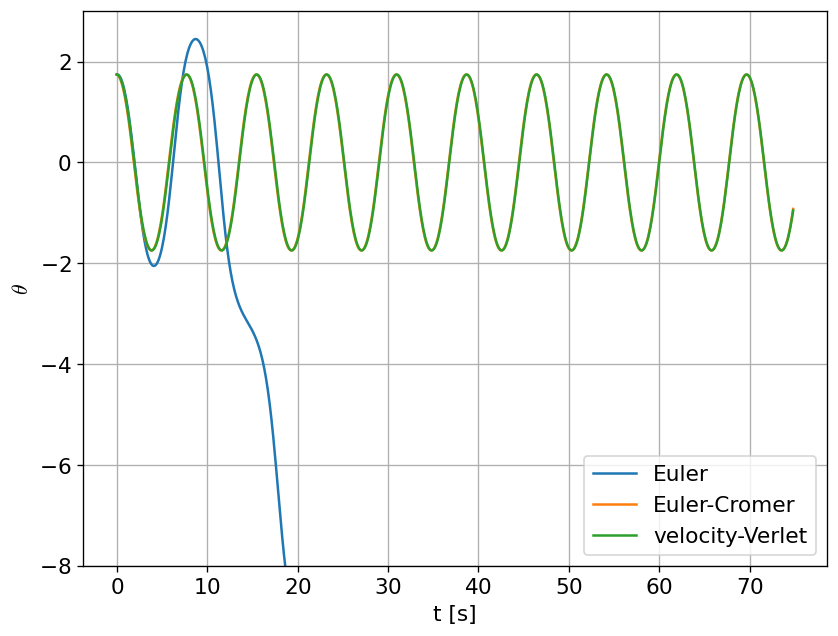

In [13]:
fig, ax = plt.subplots()

ax.plot(t_euler, theta_euler, label="Euler")
ax.plot(t_ec, theta_ec, label="Euler-Cromer")
ax.plot(t_vv, theta_vv, label="velocity-Verlet")

ax.legend()
ax.set_xlabel("t [s]")
ax.set_ylabel(r"$\theta$")

ax.set_ylim(-8, 3)
ax.grid()

Again, the Euler-Cromer and velocity-Verlet methods track nicely

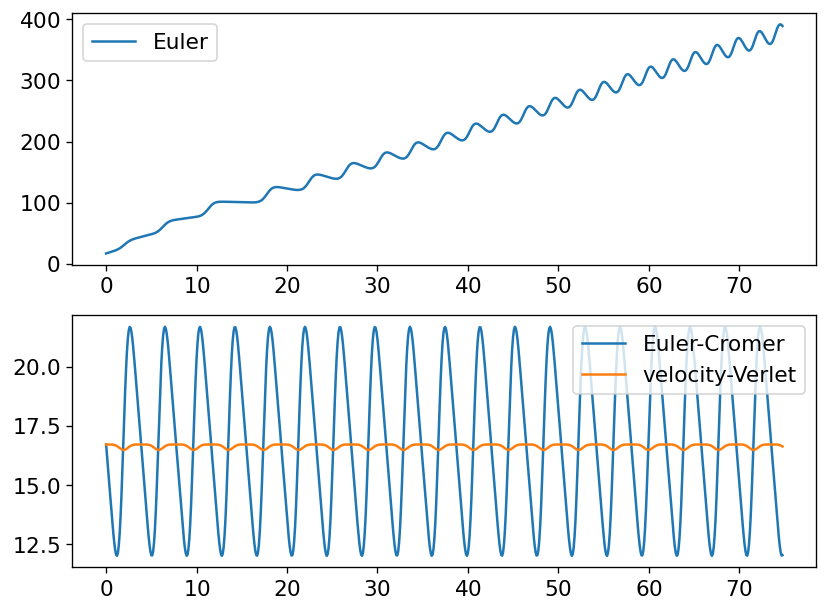

In [14]:
E_euler = p100.energy(theta_euler, omega_euler)
E_ec = p100.energy(theta_ec, omega_ec)
E_vv = p100.energy(theta_vv, omega_vv)

fig = plt.figure()

ax1 = fig.add_subplot(211)

ax1.plot(t_euler, E_euler, label="Euler")
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(t_ec, E_ec, label="Euler-Cromer")
ax2.plot(t_vv, E_vv, label="velocity-Verlet")

ax2.legend()